# Workshop 4: Python Statistics

## Exercise 1: What do you Mean?

Create an array of 1000 random numbers with a Poisonnian distribution. Plot a histogram of your results. Then, calculate the mean and standard deviation of your distribution using both the built in python functions and with the known formulas for these values. Do your calculations match?

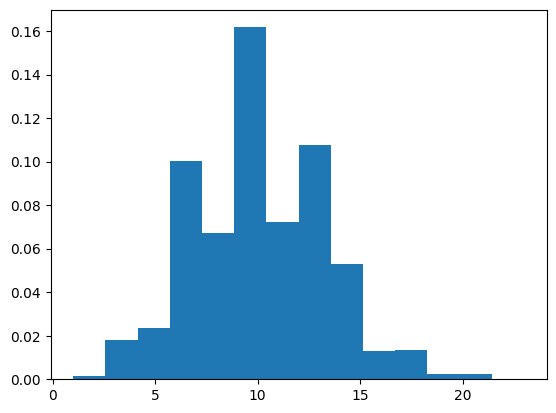

Mean = 9.985
Std. dev. = 3.177
Mean:  9.9846
std:  3.1598417681903


In [281]:
import scipy as sp
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
n = 10000
nums = np.random.poisson(10, n)

plt.hist(nums,14,density = True)
plt.show()
print('Mean = {0:5.3f}'.format(np.mean(nums)))
print('Std. dev. = {0:5.3f}'.format(np.std(nums)))
print("Mean: ",np.sum(nums)/n)
print("std: ", np.sqrt(np.sum(nums)/n))

## Exercise 2: Elemental Uncertainty

Pick 5 elements on the periodic table that have known isotopes (ex. Hydrogen has Deuterium, Carbon has Carbon 14, etc.). List the isotopes, along with their atomic mass, for each of your chosen elements. Then, create a scatterplot of atomic mass vs atomic number for your chosen elements, with error bars as determined by the variance of atomic masses that appear in the isotopes. Be sure to properly label your plot.

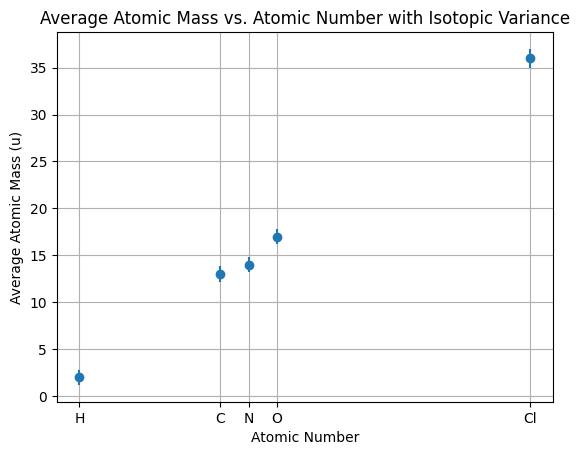

In [56]:
hydrogen = [1,2,3]
carbon = [12,13,14]
nitrogen = [13,14,15]
oxygen = [16,17,18]
chlorine = [35,37]

atomic_nums = [1,6,7,8,17]
atomic_mass = [np.mean(hydrogen),np.mean(carbon),np.mean(nitrogen),np.mean(oxygen), np.mean(chlorine)]
sigma = [np.std(hydrogen),np.std(carbon),np.std(nitrogen),np.std(oxygen),np.std(chlorine)]

plt.errorbar(atomic_nums, atomic_mass, sigma, fmt='o')
plt.xlabel('Atomic Number')
plt.ylabel('Average Atomic Mass (u)')
plt.title('Average Atomic Mass vs. Atomic Number with Isotopic Variance')
plt.grid(True)
plt.xticks(atomic_nums, ['H', 'C', 'N', 'O', 'Cl'])

plt.show()

## Exercise 3: Polynomial Fitting

The code in the cell immediately below will generate some data and store it an array of size `(500,3)` where the first column is $x$ values, the second column is the $y$ values, the third column is the uncertainty in each value. Use the techniques above to a quadratic model of the form
$$y = a_0 + a_1 x + a_2 x^2$$

Plot the data and your best fit curve with error and print out the values and their uncertainties

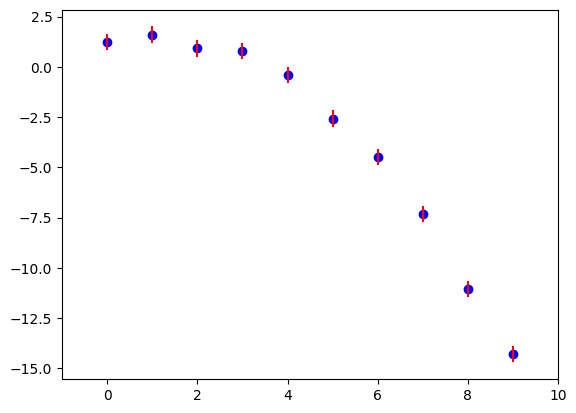

In [57]:
# Generate artificial data for Exercise 6 and plot it

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

# Generate artificial data = quadratic function with a0 = 0, a1=1, a2 = -0.3
# plus some noise.
a0 = 0.5
a1 = 1
a2 = -0.3
sig = 0.4
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0 + a1 * xdata + a2 * xdata **2 + sig * np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

a0= 1.185+/-0.314
a1= 0.577+/-0.163
a2=-0.258+/-0.017
chi^2= 3.083
chi^2/d.f = 0.440


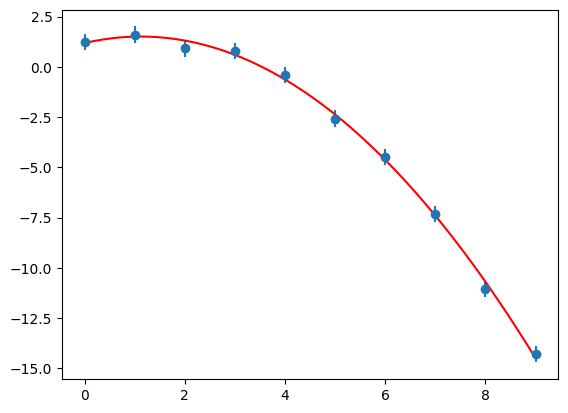

In [69]:
def func(x,a0,a1,a2):
    return a0+a1*x+a2*(x**2)
params = [0.5,-0.3,0.2]
popt, pcov = fitter.curve_fit(func,xdata,ydata,params,sigma,absolute_sigma=True)

a0 = popt[0]
ea0 = np.sqrt(pcov[0,0])
print("a0={0:6.3f}+/-{1:5.3f}".format(a0,ea0))
a1 = popt[1]
ea1 = np.sqrt(pcov[1,1])
print("a1={0:6.3f}+/-{1:5.3f}".format(a1,ea1))
a2 = popt[2]
ea2 = np.sqrt(pcov[2,2])
print("a2={0:6.3f}+/-{1:5.3f}".format(a2,ea2))

chi_square = np.sum(((func(xdata,*popt)-ydata)/sigma)**2)
reduced_chi = chi_square/(len(xdata)-len(popt))
print("chi^2= {0:5.3f}".format(chi_square))
print("chi^2/d.f = {0:5.3f}".format(reduced_chi))

plt.errorbar(xdata,ydata, xerr = 0, yerr = sigma,fmt = 'o')
xbestfit = np.linspace(0,Npoints-1,50)
plt.plot(xbestfit,func(xbestfit,popt[0],popt[1],popt[2]),'r-')
plt.show()

## Exercise 4: Normal Distributions

1. Generate $N=100$ random numbers, Gaussian-distributed with $\mu=0$ and $\sigma=1$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation, and the error on the mean. Error on the Mean = $\frac{\sigma}{\sqrt{N}}$
1. Compute the median of this distribution
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of the means. Is it consistent with your calculation of the error on the mean for $N=100$ ? About how many experiments yield a result within $1\sigma$ of the true mean of 0 ? About how many are within $2\sigma$ ? Is this what you expected?
1. Now repeat question 5 for $N=10,50,1000,10000$. Plot a graph of the standard deviation of the distribution of the means vs $N$.

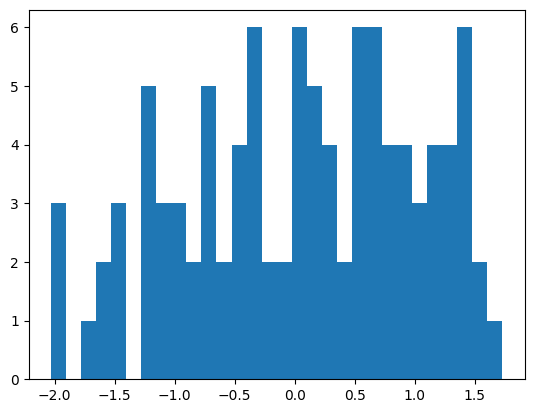

Mean:  0.044939553422487705
standard deviation:  0.9627872360503488
error on the mean:  0.09627872360503488
median:  0.11876738077424262


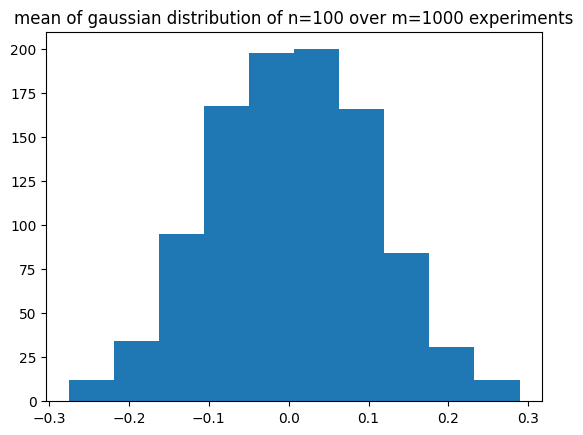

within one standard deviation:  670
within two standard deviation:  288
combined:  958


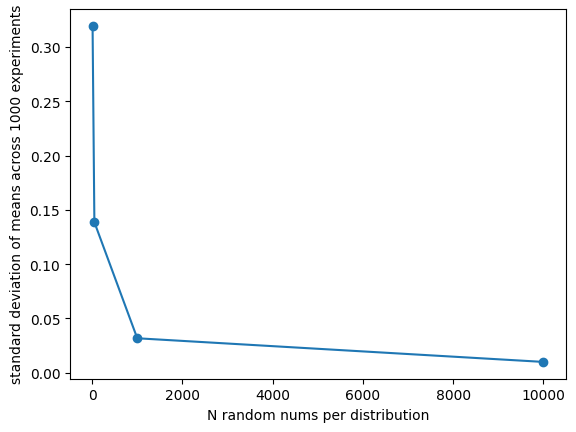

In [166]:
N = 100
xdata = np.random.normal(0,1,N)

plt.hist(xdata,30)
plt.show()
print("Mean: ",np.mean(xdata))
print("standard deviation: ",np.std(xdata))
print("error on the mean: ",np.std(xdata)/np.sqrt(N))
print("median: ",np.median(xdata))
#5
def gauss(n):
    xlin = np.random.normal(size = n)
    mean = np.mean(xlin)
    std = np.std(xlin)
    merr = std/np.sqrt(n)
    return mean,std,merr
def exper(M,N):
    means = []
    stds = []
    merrs = []
    for i in range (M):
        s = gauss(N)
        means.append(s[0])
        stds.append(s[1])
        merrs.append(s[2])
    return means,stds,merrs

stats = exper(1000,100)
plt.hist(stats[0])
plt.title('mean of gaussian distribution of n=100 over m=1000 experiments')
plt.show()

std_means = np.std(stats[0])
count_1std = 0
count_2std = 0
for num in stats[0]:
    if num >= 0-std_means and num <= 0+std_means:
        count_1std+=1
    elif num >= 0-2*std_means and num <= 0+2*std_means:
        count_2std+=1
print("within one standard deviation: ", count_1std)
print("within two standard deviation: ", count_2std)
print("combined: ",count_1std+count_2std)

#6
Ns = [10,50,1000,10000]
std_means = []
for num in Ns:
    stats = exper(1000,num)
    std_means.append(np.std(stats[0]))
plt.figure()
plt.plot(Ns,std_means,marker='o')
plt.xlabel('N random nums per distribution')
plt.ylabel('standard deviation of means across 1000 experiments')
plt.show()


## Exercise 5: Binomial Distribution

The binomial distribution with parameters $n$ and $p$ is the *discrete* probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. A typical example is a distribution of the number of *heads* for $n$ coin flips ($p=0.5$) 

The function `np.random.binomial(n,p)` requires two arguments, `n` the number of events in a single trial and `p` the probability of the desired outcome. `size` is another optional keyword argument.
1. Generate an array of outcomes for flipping 1 unbiased coin 10 times.
1. Plot the outcomes in a histogram (0=heads, 1=tails). 
1. Compute mean, standard deviation, and the error on the mean. Is this what you expected?

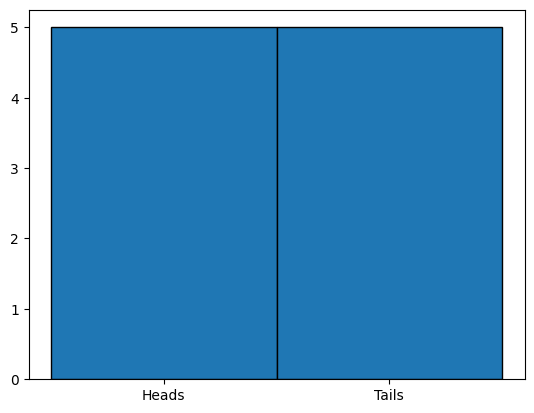

means:  0.5
standard deviation:  0.5
error on the mean:  0.15811388300841897


In [243]:
n = 10
outcome = np.random.binomial(1,.5,n)
plt.hist(outcome, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['Heads', 'Tails'])
plt.show()
print("means: ", np.mean(outcome))
print("standard deviation: ",np.std(outcome))
print("error on the mean: ",np.std(outcome)/np.sqrt(n))
#i expected it to be not 50/50 each time, I was unsurprised by results. naturally, as I do more trials, the number will get closer to 50/50

## Exercise 6: Root Finding

Consider a sixth-order polynomial: 

$f(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1$

There is no general formula for the roots of a polynomial of degree 6, but you can compute the roots numerically.

Make a plot of  from  to  and by inspecting it find rough values for the six roots of the polynomial.
Write the code to solve for the positions of all six roots to at least ten decimal places using at least one of the methods dsicussed in class. (you can/should use the built-in functions).
Hint: I would recommend using fsolve in the scipy library

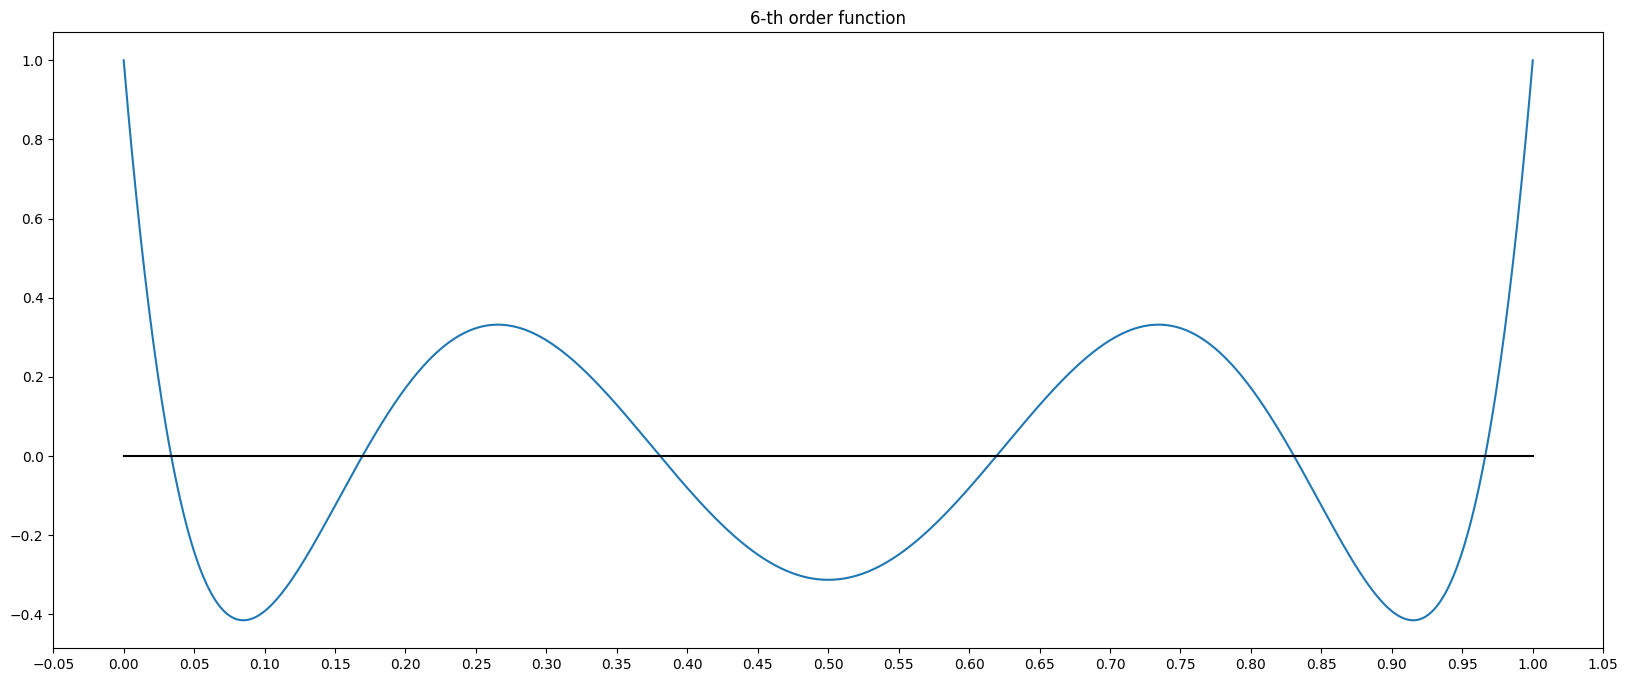

roots:  [0.03376524 0.16939531 0.38069041 0.61930959 0.83060469 0.96623476]


In [266]:
from scipy.optimize import fsolve
def func(x): 
    return 924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1
x = np.linspace(0,1,1000)
xaxis = np.zeros(1000)
plt.figure(figsize=[20,8])
plt.title("6-th order function")
plt.plot(x,func(x))
plt.plot(x,xaxis,'k')
plt.locator_params(axis='x', nbins=40)  
plt.show()
#approximately zeroes at x = 0.03, 0.17, 0.38, 0.62, 0.825, 0.97

roots = fsolve(func,[0.03, 0.17, 0.38, 0.62, 0.825, 0.97])
print("roots: ", roots)

## Exercise 7: Optical Pumping

One of the experiments in the Physics 111B lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line and draw the best-fit line through the data points in the graph.
1. From what they know about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


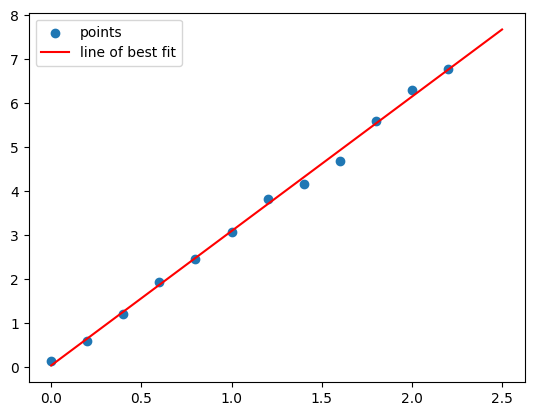

chi^2:  1517.991841491841  degrees free:  10
p valuefor 0.01 uncertainty:  0.0

chi^2:  0.15179918414918406  degrees free:  10
p value for 1.0 uncertainty:  1.00

error on each point: 0.123


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [300]:
from scipy.optimize import curve_fit
def model(x,a,b):
    return a+b*x
current = [0.0,.2,.4,.6,.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2]
freq = [.14,.6,1.21,1.94,2.47,3.07,3.83,4.16,4.68,5.6,6.31,6.78]
plt.figure()
plt.scatter(current,freq)
par0 = np.array([0.0, 1.0])
par, cov = curve_fit(model, current, freq, p0=par0)
xlin = np.linspace(0,2.5,100)
plt.plot(xlin,model(xlin,par[0],par[1]),'r', )
plt.legend(['points','line of best fit'])
plt.show()

#2
sigma = [.01]*12
deg_free = len(freq)-2
chi_2 = np.sum(((model(np.array(current), *par)-freq)/sigma)**2)
print("chi^2: ", chi_2, " degrees free: ",deg_free)
print("p valuefor 0.01 uncertainty: ", st.chi2.sf(chi_2,deg_free))
#since p value is 0, this is not good uncertainty

#3
sigma = [1.0]*12
deg_free = len(freq)-2
chi_2 = np.sum(((model(np.array(current), *par)-freq)/sigma)**2)
print("\nchi^2: ", chi_2, " degrees free: ",deg_free)
print("p value for 1.0 uncertainty: {0:5.2f}".format(st.chi2.sf(chi_2,deg_free)))
#much better uncertainty. is 1.0. is possible correct uncertainty.

#4
sigc = np.sqrt(np.sum(((model(np.array(current),*par)-freq))**2/deg_free))
print("\nerror on each point: {0:5.3f}".format(sigc))
a_err = np.sqrt((sigc**2)*np.sum(current**2)/(len(current)*np.sum(current**2)-(np.sum(current)**2)))
b_err = np.sqrt((sigc**2)*len(current)/(len(current)*np.sum(current**2)-(np.sum(current)**2)))
print(a_err,b_err)

#5
#i cant figure out how to do this.